In [23]:
import pandas as pd

In [24]:
parks = pd.read_csv("national_park_trails.csv")

# Question 1
What is the average elevation gain of all trails in Alaska with a difficulty rating of 4 or higher?

In [25]:
parks[(parks["state_name"] == "Alaska") & (parks["difficulty_rating"] >= 4)][["elevation_gain"]].mean()

elevation_gain    1027.306629
dtype: float64

# Question 2
Which state has the most trails that are loop-type?

In [26]:
# loop trails is not in the correct df format, which is why idxmax() is producing "California"
# if you want it to convert to an actual df, do commented code
# the indexes in this are the states
loop_trails = parks[parks["route_type"] == "loop"].groupby("state_name")[["name"]].count()
loop_trails.idxmax()

# loop_trails = parks[parks["route_type"] == "loop"].groupby("state_name")[["name"]].count().reset_index()
# index = loop_trails["name"].idxmax()
# loop_trails["state_name"].iloc[index]

name    California
dtype: object

# Question 3
What is the total number of reviews for trails with the birding feature in their description?


In [27]:
parks[parks["activities"].apply(lambda x: "birding" in x)][["num_reviews"]].sum()


num_reviews    160501
dtype: int64

# Question 4
What is the average trail popularity for all trails in Yosemite National Park?


In [28]:
parks[parks["area_name"] == "Yosemite National Park"][["popularity"]].mean()

popularity    9.235686
dtype: float64

# Question 5
How many trails are categorized as both “hiking” and “birding” activities in California?


In [29]:
ca = parks[parks["state_name"] == "California"]
ca[ca["activities"].apply(lambda x: "birding" in x and "hiking" in x)].count()

trail_id             410
name                 410
area_name            410
city_name            410
state_name           410
country_name         410
_geoloc              410
popularity           410
length               410
elevation_gain       410
difficulty_rating    410
route_type           410
visitor_usage        394
avg_rating           410
num_reviews          410
features             410
activities           410
units                410
dtype: int64

# Question 6
What percentage of trails in the United States have a 5-star average rating?


In [30]:
trails_5 = parks[parks["avg_rating"] == 5][["trail_id"]].count()
trails_5
trails_total = parks["trail_id"].count()
trails_total
(trails_5/trails_total) *100

trail_id    16.269242
dtype: float64

# Question 7
Which city has the highest number of trails with the ‘waterfall’ feature?

In [31]:
waterfall = parks[parks["features"].apply(lambda x: "waterfall" in x)].groupby("city_name")[["trail_id"]].count()
waterfall.idxmax()

trail_id    Yosemite Valley
dtype: object

# Question 8
Find the trail with the highest difficulty rating in Denali National Park that also has a length shorter than 8 kilometers.

In [32]:
denali = parks[(parks["area_name"] == "Denali National Park") & (parks["length"] < 8000)]
denali.sort_values(by = "difficulty_rating", ascending = False)

#denali.groupby("name")["difficulty_rating"].max()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
9,10327620,Mount Thorofare Ridge Loop,Denali National Park,Cantwell,Alaska,United States,"{'lat': 63.43108, 'lng': -150.31096}",5.7990,6598.294,507.7968,5,loop,1.0,4.5,5,"['forest', 'views', 'wild-flowers', 'wildlife']",['hiking'],i
15,10358126,Camp Ridge Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.52451, 'lng': -150.96072}",3.6654,6759.228,538.8864,5,out and back,1.0,5.0,8,"['dogs-no', 'forest', 'views', 'wildlife']","['hiking', 'trail-running']",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
6,10236080,Rock Creek Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73056, 'lng': -148.91955}",7.6876,7081.096,287.7312,3,out and back,1.0,4.0,39,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
7,10236075,Taiga Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73043, 'lng': -148.91922}",5.9038,2574.944,62.7888,3,loop,1.0,4.0,27,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
11,10333556,Tiaga Loop and Horseshoe Lake Trail to Beaver Dam,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73128, 'lng': -148.9171}",4.6043,4828.020,158.8008,3,loop,2.0,4.5,15,"['dogs-no', 'forest', 'lake', 'views']","['birding', 'hiking', 'nature-trips', 'walking']",i
12,10265251,Blueberry Hill Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.49541, 'lng': -150.88137}",4.1956,1448.406,46.9392,3,out and back,2.0,4.5,6,"['dogs-no', 'lake', 'views', 'wildlife']",['hiking'],i
22,10333558,McKinley Station and Morino Loop Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.7315, 'lng': -148.91785}",2.0877,1448.406,33.8328,3,loop,2.0,3.0,4,"['dogs-no', 'views', 'wild-flowers']","['hiking', 'nature-trips', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
8,10236084,McKinley Station Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73324, 'lng': -148.89659}",5.8885,4667.086,113.9952,1,loop,1.0,4.5,21,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['birding', 'hiking', 'nature-trips', 'trail-r...",i


# Question 9
How many trails have more than 50 reviews but a popularity score of less than 4?


In [33]:
parks[(parks["num_reviews"]> 50) & (parks["popularity"] < 4)].count()

trail_id             5
name                 5
area_name            5
city_name            5
state_name           5
country_name         5
_geoloc              5
popularity           5
length               5
elevation_gain       5
difficulty_rating    5
route_type           5
visitor_usage        5
avg_rating           5
num_reviews          5
features             5
activities           5
units                5
dtype: int64

# More Questions

Reshape the dataset so that instead of having the columns popularity, length, and elevation_gain, these values appear in a single "metric" column with a corresponding "value" column. Keep the trail_id, name, and state_name as identifier columns.

In [34]:
metric_data = parks.melt(id_vars = ["trail_id", "name", "state_name"],
                         var_name = "metric",
                         value_vars = ["popularity", "length", "elevation_gain"],
                         value_name = "value")
metric_data.head()

,trail_id,name,state_name,metric,value
0,10020048,Harding Ice Field Trail,Alaska,popularity,24.8931
1,10236086,Mount Healy Overlook Trail,Alaska,popularity,18.0311
2,10267857,Exit Glacier Trail,Alaska,popularity,17.7821
3,10236076,Horseshoe Lake Trail,Alaska,popularity,16.2674
4,10236082,Triple Lakes Trail,Alaska,popularity,12.5935


Reshape the above dataset so that instead of having multiple rows for each trail, with columns for popularity, length, and elevation_gain, each of these metrics becomes a column of its own. Each trail should appear once, with popularity, length, and elevation_gain as separate columns.

In [35]:
sep_data = metric_data.pivot(index = ["trail_id", "name", "state_name"],
                             columns = "metric",
                             values = "value").reset_index()
sep_data.head()

metric,trail_id,name,state_name,elevation_gain,length,popularity
0,10000013,McKittrick Canyon Trail,Texas,1330.7568,32508.668,11.5435
1,10000030,Dorr Mountain Ladder Trail,Maine,344.7288,4345.218,17.7959
2,10000049,Rendezvous Mountain Trail,Wyoming,608.9904,11104.446,4.6573
3,10000054,Sourdough Ridge Nature Trail,Washington,215.7984,6276.426,15.5555
4,10000147,Boston Run Trail,Ohio,70.7136,4988.954,10.5799


# Function Writing Questions

# Question 1
Write a function that normalizes the length column (scales values to a range between 0 and 1) and adds a new column length_normalized. Hint: You can use Min-Max scaling

In [36]:
def normalize_length(data, length):
    data_max = data["length"].max()
    data_min = data["length"].min()
    normalized_val = (data["length"] - data_min)/(data_max - data_min)

    return normalized_val


In [37]:
# test function
normalize_length(parks, "length")

# add column to df

parks["length_normalized"] = normalize_length(parks, "length")
parks.head(2)


,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units,length_normalized
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i,0.029465
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i,0.013062


# Question 2
Create a function that adds a new column difficulty_category to the DataFrame, which categorizes trails based on their difficulty_rating:
1-2: Easy
3: Moderate
4-5: Hard


In [38]:
def categorize_trail(difficulty_rating):
   if difficulty_rating <= 2:
      return "Easy"
   elif difficulty_rating == 3:
      return "Moderate"
   elif difficulty_rating >= 4:
      return "Hard"
   else:
      return "N/A"
 

In [39]:
# test func
parks["difficulty_category"] = parks.apply(lambda x: categorize_trail(x["difficulty_rating"]), 
axis = 1)


# Question 3
Write a function that identifies trails with the greatest number of activities (i.e., trails that are used for many different purposes). 

# Question 4
Write a function that calculates the elevation gain per kilometer for each trail, then filters out trails where the elevation gain per kilometer is above the 90th percentile. Return the most popular trails (based on popularity) among those with unusually high elevation gains

# Lambda

In [40]:
#Create a List of Features as a String

In [41]:
### 21. Extract the Latitude from the Geolocation

#parks['latitude'] = parks['_geoloc'].apply(lambda x: x['lat'])


parks['_geoloc'] = parks['_geoloc'].str.replace("{", "").str.replace("}", "")

parks[['latitude', 'longitude']] = parks['_geoloc'].str.split(", ", expand=True)

parks['latitude'] = parks['latitude'].str.split(": ").str[1].astype(float)
parks['longitude'] = parks['longitude'].str.split(": ").str[1].astype(float)

In [44]:
# create new column called is long, where if over 10km, it's considered long

parks['is_long'] = parks['length'].apply(lambda x: 'long' if x > 10000 else 'short')

pd.crosstab((parks["is_long"] == "short"), (parks["is_long"] == "long"))


is_long,False,True
is_long,,
False,0,1728
True,1585,0


In [54]:
vis_trail = parks[(parks["visitor_usage"] == 3) | (parks["visitor_usage"] == 4)]

<positron-console-cell-57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


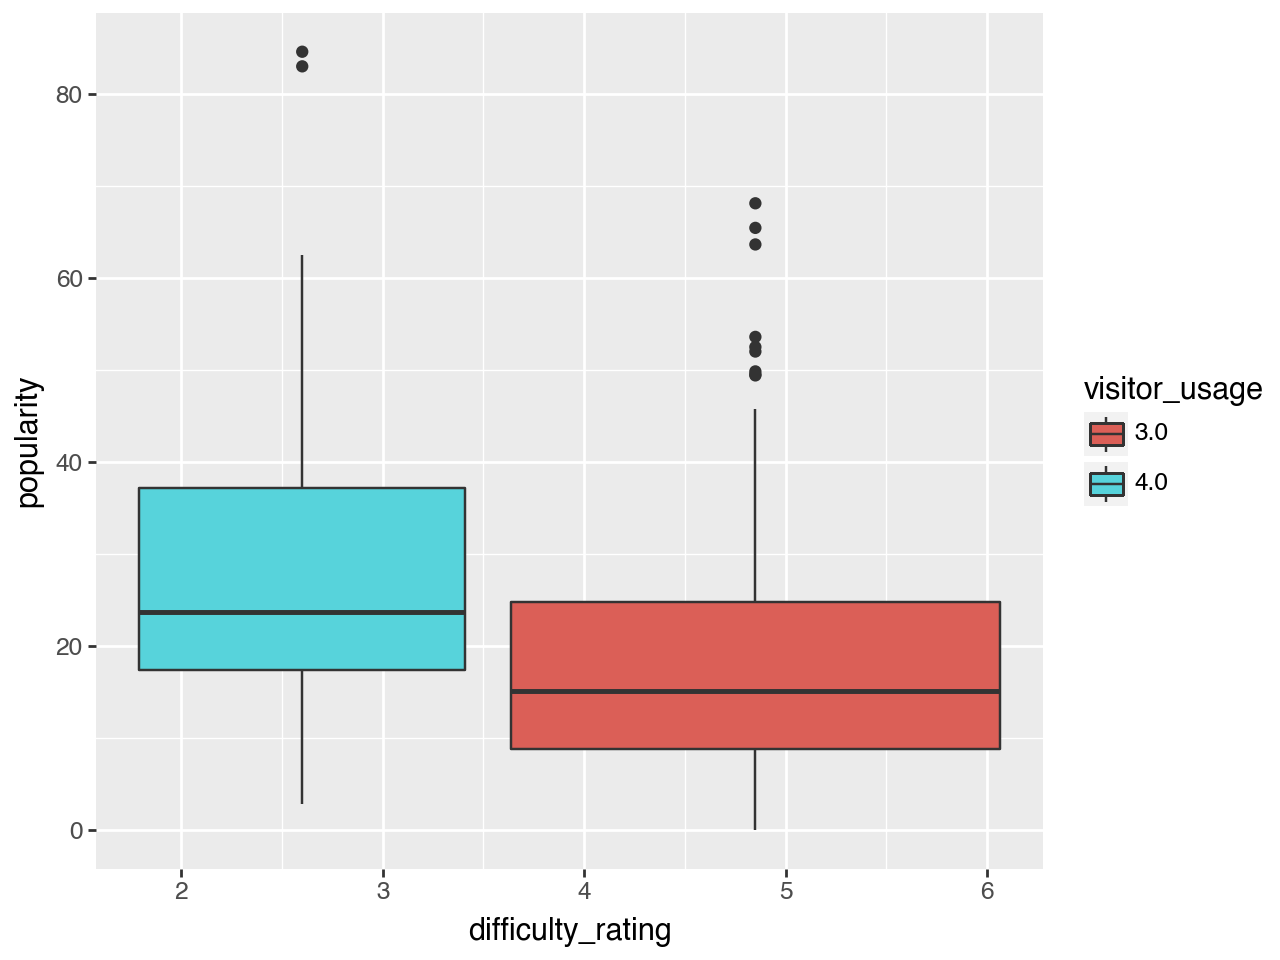

In [57]:
from plotnine import *

vis_trail["visitor_usage"] = vis_trail["visitor_usage"].astype("str")

(ggplot(vis_trail, aes(x='difficulty_rating', y='popularity', fill='visitor_usage')) +
    geom_boxplot())